Student Name: Prince Bhagat <br>
Student Id: 2406779

# Assignment-1: Statisitical Interpretation and Exploratory Data Analysis

#### Problem - 1: Getting Started with Data Exploration - Some Warm up

#### Data Exploration and Understanding: <br>
• Dataset Overview:<br>
 1. Load the dataset and display the first 10 rows.<br>
 2. Identify the number of rows and columns in the dataset.<br>
 3. List all the columns and their data types.<br>

In [4]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from networkx.algorithms.bipartite.basic import color
plt.style.use('ggplot')

In [5]:
#Loading dataset WHR-2024-5CS037
df = pd.read_csv('WHR-2024-5CS037.csv')

In [6]:
#Dispalying first 10 rows using head
df.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [7]:
# Using shape function to identify the row and column of the dataset
df.shape

(143, 9)

In [8]:
# Using info() function to retrieve all the column name and there datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   score                         143 non-null    float64
 2   Log GDP per capita            140 non-null    float64
 3   Social support                140 non-null    float64
 4   Healthy life expectancy       140 non-null    float64
 5   Freedom to make life choices  140 non-null    float64
 6   Generosity                    140 non-null    float64
 7   Perceptions of corruption     140 non-null    float64
 8   Dystopia + residual           140 non-null    float64
dtypes: float64(8), object(1)
memory usage: 10.2+ KB


#### Renaming dataset columns


In [9]:
# Writing column name in proper naming order
df = df.rename(columns={
    'Country name':'Country_Name',
    'score':'Score',
    'Log GDP per capita':'Log_GDP_Per_Capita',
    'Social support':'Social_Support',
    'Healthy life expectancy':'Healthy_Life_Expectancy',
    'Freedom to make life choices':'Freedom_to_Make_Life_Choices',
    'Perceptions of corruption':'Perceptions_of_Corruption',
    'Dystopia + residual':'Dystopia_and_Residual',
})

In [10]:
df.columns

Index(['Country_Name', 'Score', 'Log_GDP_Per_Capita', 'Social_Support',
       'Healthy_Life_Expectancy', 'Freedom_to_Make_Life_Choices', 'Generosity',
       'Perceptions_of_Corruption', 'Dystopia_and_Residual'],
      dtype='object')

#### • Basic Statistics:
#### 1. Calculate the mean, median, and standard deviation for the Score column.
#### 2. Identify the country with the highest and lowest happiness scores.

In [11]:
df['Score']

0      7.741
1      7.583
2      7.525
3      7.344
4      7.341
       ...  
138    3.295
139    3.245
140    3.186
141    2.707
142    1.721
Name: Score, Length: 143, dtype: float64

In [12]:
# Calculating mean, median and standard deviation

# Mean
mean_value = df['Score'].mean()
print(f"The mean score is: {round(mean_value, 2)}")

# Median
median_value = df['Score'].median()
print(f"The median score is: {round(median_value,2)}")

# Standard Deviation
standard_deviation = df['Score'].std()
print(f"The standard deviation is: {round(standard_deviation,2)}")

The mean score is: 5.53
The median score is: 5.79
The standard deviation is: 1.17


In [13]:
# Country with the highest happiness score
highest_happiness_score = df.loc[df['Score'].idxmax()]
print(f"Country with highest happiness value is: {highest_happiness_score['Country_Name']}.\nIt's score is: {round(highest_happiness_score['Score'],2)}")

Country with highest happiness value is: Finland.
It's score is: 7.74


In [14]:
# Country with lowest happiness score
lowest_happiness_score = df.loc[df['Score'].idxmin()]
print(f"Country with lowest happiness value is: {lowest_happiness_score['Country_Name']}\nIt's score is: {round(lowest_happiness_score['Score'],2)}")

Country with lowest happiness value is: Afghanistan
It's score is: 1.72


#### • Missing Values:
1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [15]:
#Checking for missing values and finding there sum
df.isnull().sum()

Country_Name                    0
Score                           0
Log_GDP_Per_Capita              3
Social_Support                  3
Healthy_Life_Expectancy         3
Freedom_to_Make_Life_Choices    3
Generosity                      3
Perceptions_of_Corruption       3
Dystopia_and_Residual           3
dtype: int64

#### • Filtering and Sorting:
1. Filter the dataset to show only the countries with a Score greater than 7.5.
2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.


In [16]:
df.head(5)

,Country_Name,Score,Log_GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_to_Make_Life_Choices,Generosity,Perceptions_of_Corruption,Dystopia_and_Residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [17]:
#Countries with score more than 7.5

score_above_7 = df.loc[df['Score'] > 7.5]
countries_score_above_7 = score_above_7['Country_Name']
print(f"The country which scored above 7.5 are:\n{countries_score_above_7}")

The country which scored above 7.5 are:
0    Finland
1    Denmark
2    Iceland
Name: Country_Name, dtype: object


In [18]:
#Sorting the filtered dataset by Log_GDP_Per_Capita column
sort_by_gdp = df.sort_values('Log_GDP_Per_Capita', ascending=False)
sort_by_gdp.head(10)

,Country_Name,Score,Log_GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_to_Make_Life_Choices,Generosity,Perceptions_of_Corruption,Dystopia_and_Residual
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
16,Ireland,6.838,2.129,1.390,0.700,0.758,0.205,0.418,1.239
29,Singapore,6.523,2.118,1.361,0.769,0.743,0.168,0.575,0.788
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
22,United States,6.725,1.939,1.392,0.542,0.586,0.223,0.169,1.873
85,Hong Kong S.A.R. of China,5.316,1.909,1.184,0.857,0.485,0.147,0.402,0.333
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906


#### • Adding New Columns:
1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:
<br>
Low − (Score < 4)<br>
Medium − (4 ≤ Score ≤ 6)<br>
High − (Score > 6)

In [19]:
#Creating function to return relevant happiness category

def happinessCategory(score):
    if (score<4):
        return 'Low'
    elif (score>=4 and score<6):
        return 'Medium'
    elif (score>6):
        return 'High'
    else:
        return ''

df['Happiness_Category'] = df['Score'].apply(happinessCategory)

## Data visualization

#### • Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

In [20]:
top_ten_happiest_countries = df.sort_values(by='Score', ascending=False).head(10)

In [21]:
top_ten_happiest_countries

,Country_Name,Score,Log_GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_to_Make_Life_Choices,Generosity,Perceptions_of_Corruption,Dystopia_and_Residual,Happiness_Category
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082,High
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881,High
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050,High
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658,High
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906,High
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586,High
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540,High
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488,High
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745,High


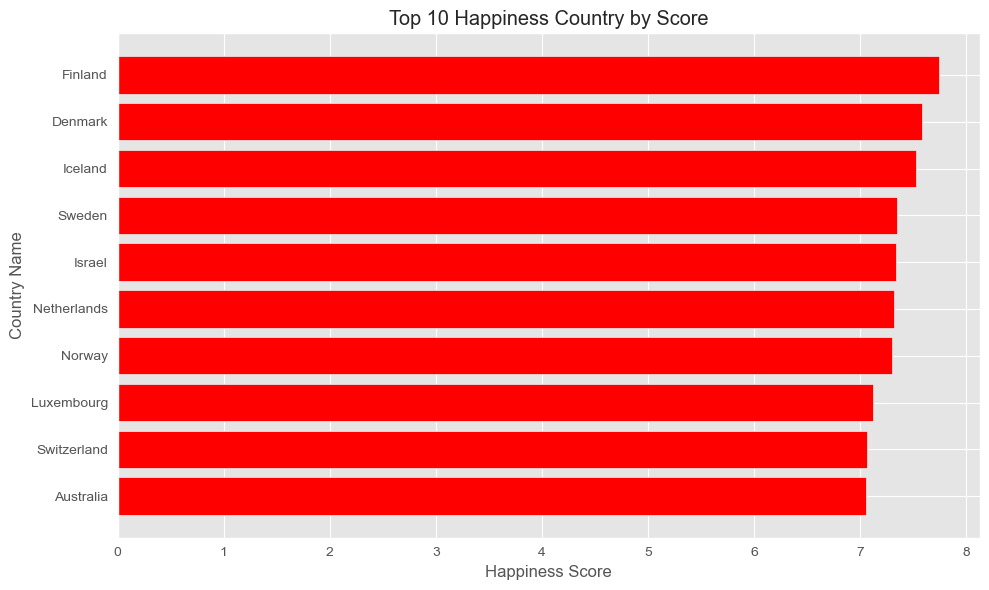

In [22]:
plt.figure(figsize = (10,6))
plt.barh(
    top_ten_happiest_countries['Country_Name'],
    top_ten_happiest_countries['Score'],
    color='red',
)
plt.xlabel('Happiness Score')
plt.ylabel('Country Name')
plt.title('Top 10 Happiness Country by Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### • Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

In [23]:
top_ten_unhappiest_countries = df.sort_values(by='Score').head(10)

In [24]:
top_ten_unhappiest_countries

,Country_Name,Score,Log_GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_to_Make_Life_Choices,Generosity,Perceptions_of_Corruption,Dystopia_and_Residual,Happiness_Category
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low
140,Lesotho,3.186,0.771,0.851,0.000,0.523,0.082,0.085,0.875,Low
139,Sierra Leone,3.245,0.654,0.566,0.253,0.469,0.181,0.053,1.068,Low
138,Congo (Kinshasa),3.295,0.534,0.665,0.262,0.473,0.189,0.072,1.102,Low
137,Zimbabwe,3.341,0.748,0.850,0.232,0.487,0.096,0.131,0.797,Low
136,Botswana,3.383,1.445,0.969,0.241,0.567,0.014,0.082,0.066,Low
135,Malawi,3.421,0.617,0.410,0.349,0.571,0.135,0.136,1.203,Low
134,Eswatini,3.502,1.255,0.925,0.176,0.284,0.059,0.116,0.686,Low
133,Zambia,3.502,0.899,0.809,0.264,0.727,0.168,0.109,0.526,Low


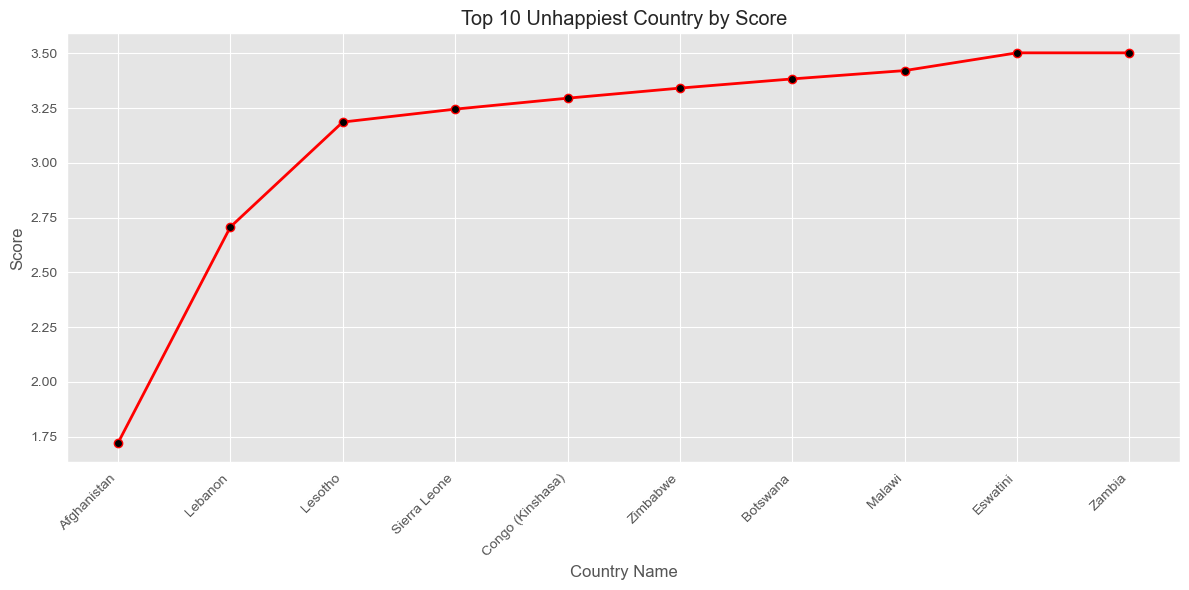

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(
    top_ten_unhappiest_countries['Country_Name'],
    top_ten_unhappiest_countries['Score'],
    color='red',
    linewidth=2,
    linestyle='-',
    marker='o',
    markerfacecolor='black'
)
plt.xlabel('Country Name')
plt.ylabel('Score')
plt.title('Top 10 Unhappiest Country by Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### • Plot a histogram for the Score column to show its distribution and also interpret.

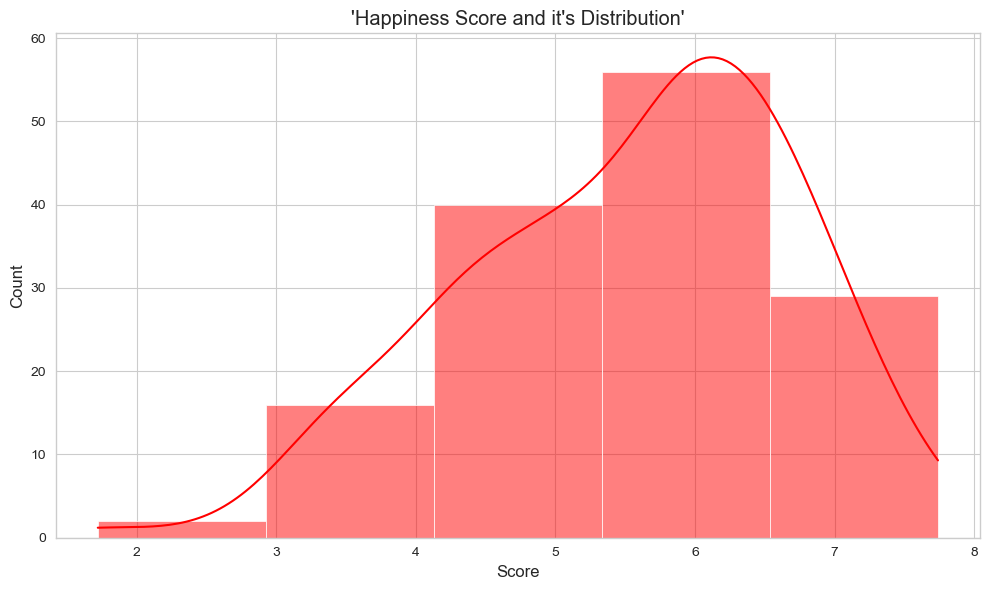

In [134]:
plt.figure(figsize = (10,6))
sns.histplot(df['Score'], kde=True, bins=5, color='red')
plt.xlabel('Score')
plt.ylabel('Count')
plt.title("'Happiness Score and it's Distribution'")
plt.tight_layout()
plt.show()

#### • Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

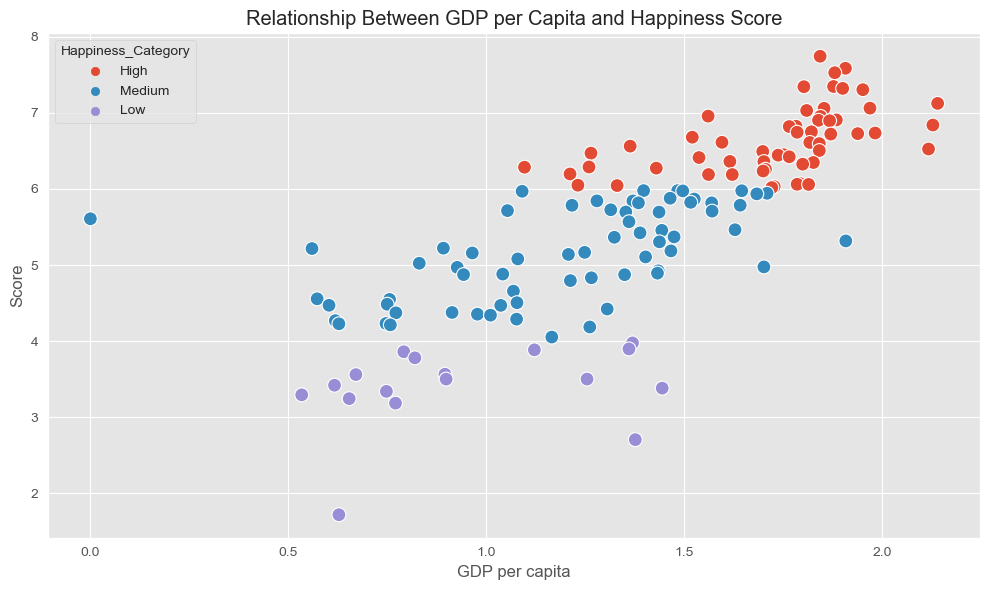

In [27]:
plt.figure(figsize = (10,6))
sns.scatterplot(data=df, x='Log_GDP_Per_Capita', y='Score', color='red', s=100, hue='Happiness_Category')
plt.xlabel('GDP per capita')
plt.ylabel('Score')
plt.title('Relationship Between GDP per Capita and Happiness Score')
plt.tight_layout()
plt.show()

## 3.2 Problem - 2 - Some Advance Data Exploration Task:

#### Task - 1 - Setup Task - Preparing the South-Asia Dataset:
Steps:
1. Define the countries in South Asia with a list for example:
    south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",

                             "Maldives", "Nepal", "Pakistan", "Srilanka"]

2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
3. Save the filtered dataframe as separate CSV files for future use.

In [28]:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Srilanka"]

In [29]:
df_south_asian_countries = df.loc[df['Country_Name']\
    .isin(south_asian_countries)]\
    .head(10)

In [30]:
df_south_asian_countries

,Country_Name,Score,Log_GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_to_Make_Life_Choices,Generosity,Perceptions_of_Corruption,Dystopia_and_Residual,Happiness_Category
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low


In [138]:
#df_south_asian_countries.to_csv('south_asian_country.csv', index=False)

#### Task - 2 - Composite Score Ranking:
Tasks:
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support

+ 0.30 × Healthy Life Expectancy
2. Rank the South Asian countries based on the Composite Score in descending order.
3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

In [32]:
# Importing south asian country csv file
df_south = pd.read_csv('south_asian_countries.csv')

In [33]:
df_south.head()

,Country_Name,Score,Log_GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_to_Make_Life_Choices,Generosity,Perceptions_of_Corruption,Dystopia_and_Residual,Happiness_Category
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
3,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low
4,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low


In [34]:
# Finding the composite score for each south asian country

df_south['Composite_Score'] = 0.40 * df_south['Log_GDP_Per_Capita'] + 0.30 * df_south['Social_Support']+0.30 * df_south['Healthy_Life_Expectancy']

In [35]:
df_south.head()

,Country_Name,Score,Log_GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_to_Make_Life_Choices,Generosity,Perceptions_of_Corruption,Dystopia_and_Residual,Happiness_Category,Composite_Score
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874
3,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774
4,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238


In [36]:
#

order_south_countries_desc = df_south.sort_values(by='Composite_Score', ascending=False)
order_south_countries_desc.head()

,Country_Name,Score,Log_GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_to_Make_Life_Choices,Generosity,Perceptions_of_Corruption,Dystopia_and_Residual,Happiness_Category,Composite_Score
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039
3,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774
4,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238


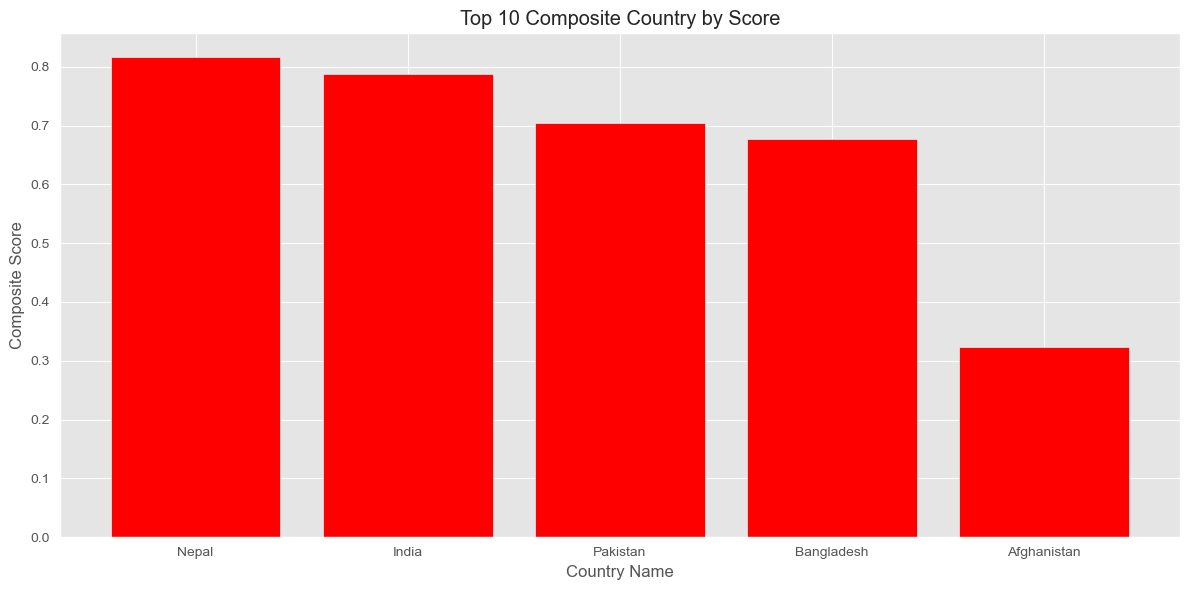

In [37]:
plt.figure(figsize = (12,6))
plt.bar(
    order_south_countries_desc['Country_Name'],
    order_south_countries_desc['Composite_Score'],
    color='red',
)
plt.xlabel('Country Name')
plt.ylabel('Composite Score')
plt.title('Top 10 Composite Country by Score')
plt.tight_layout()
plt.show()

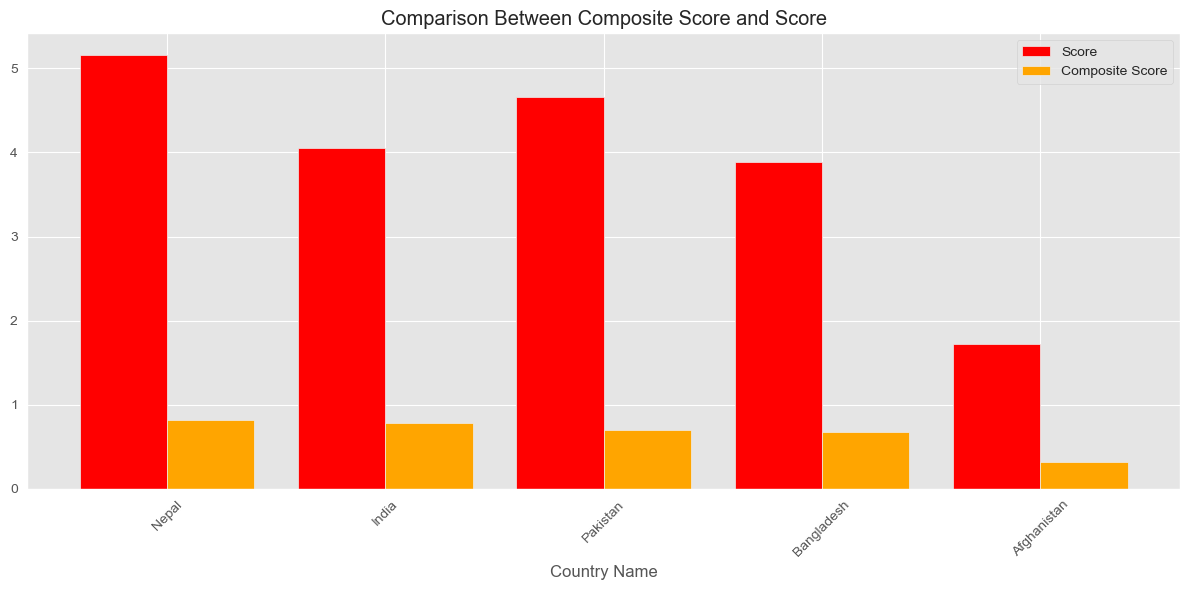

In [38]:
bar_width = 0.4
x_axis_position = np.arange(len(order_south_countries_desc['Country_Name']))

plt.figure(figsize=(12, 6))
plt.bar(
    x_axis_position - bar_width / 2,
    order_south_countries_desc['Score'],
    bar_width,
    color='red',
    label='Score'
)
plt.bar(
    x_axis_position + bar_width / 2,
    order_south_countries_desc['Composite_Score'],
    bar_width,
    color='orange',
    label='Composite Score'
)
plt.xticks(x_axis_position, order_south_countries_desc['Country_Name'], rotation=45)  # Rotating for clarity
plt.xlabel('Country Name')
plt.title('Comparison Between Composite Score and Score')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
#describe

#### Task - 3 - Outlier Detection:
Tasks:
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
2. Define outliers using the 1.5 × IQR rule.
3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.
4. Discuss the characteristics of these outliers and their potential impact on regional averages.

In [39]:
df_south['Score']

0    5.158
1    4.657
2    4.054
3    3.886
4    1.721
Name: Score, dtype: float64

In [40]:
#finding Q1, Q3 and IQR score of the column Score
q1_score = df_south['Score'].quantile(0.25)
q3_score = df_south['Score'].quantile(0.75)
IQR_Score = (q3_score - q1_score)

lower_bound_score = q1_score - 1.5 * IQR_Score
upper_bound_score = q3_score + 1.5 * IQR_Score

In [41]:
#finding Q1, Q3 and IQR score of the column GDP per capita
q1_GDP = df_south['Log_GDP_Per_Capita'].quantile(0.25)
q3_GDP = df_south['Log_GDP_Per_Capita'].quantile(0.75)
IQR_GDP = (q3_GDP - q1_GDP)

lower_bound_GDP = q1_GDP - 1.5 * IQR_GDP
upper_bound_GDP = q3_GDP + 1.5 * IQR_GDP

In [42]:
# Finding outliers
outliers = df_south[
    (df_south['Score']<lower_bound_score) |
    (df_south['Score']>upper_bound_score) |
    (df_south['Log_GDP_Per_Capita']<lower_bound_GDP) |
    (df_south['Log_GDP_Per_Capita']>upper_bound_GDP)
]

outliers

,Country_Name,Score,Log_GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_to_Make_Life_Choices,Generosity,Perceptions_of_Corruption,Dystopia_and_Residual,Happiness_Category,Composite_Score
4,Afghanistan,1.721,0.628,0.0,0.242,0.0,0.091,0.088,0.672,Low,0.3238


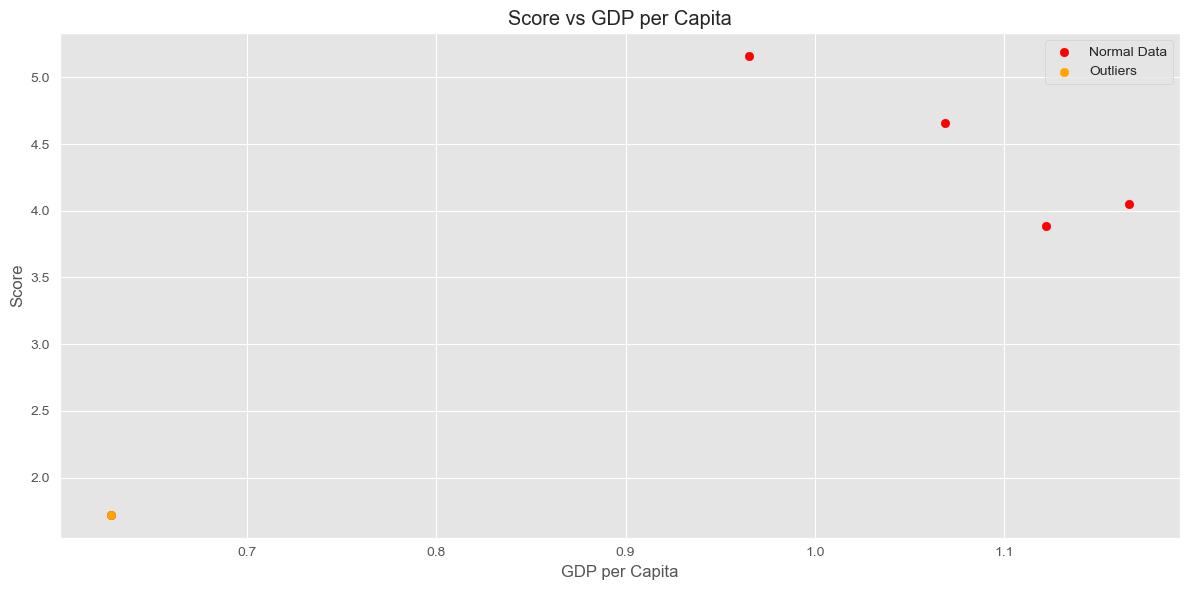

In [43]:
# Scatter plot for outliers
plt.figure(figsize = (12,6))
plt.scatter(
    df_south['Log_GDP_Per_Capita'],
    df_south['Score'],
    label='Normal Data',
    color='red',
)
plt.scatter(
    outliers['Log_GDP_Per_Capita'],
    outliers['Score'],
    label='Outliers',
    color='orange',
)
plt.title('Score vs GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Score')
plt.legend()
plt.tight_layout()
plt.show()

In [44]:
# Conclusion

#### Task - 4 - Exploring Trends Across Metrics:
Tasks:
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.
2. Create scatter plots with trendlines for these metrics against the Score.
3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
    South Asian countries.

In [45]:
df_south.columns

Index(['Country_Name', 'Score', 'Log_GDP_Per_Capita', 'Social_Support',
       'Healthy_Life_Expectancy', 'Freedom_to_Make_Life_Choices', 'Generosity',
       'Perceptions_of_Corruption', 'Dystopia_and_Residual',
       'Happiness_Category', 'Composite_Score'],
      dtype='object')

In [46]:
correlation_freedom_to_make_life_choice = round(df_south['Freedom_to_Make_Life_Choices'].corr(df_south['Score']),2)
correlation_freedom_to_make_life_choice

0.8

In [47]:
correlation_genocity = round(df_south['Generosity'].corr(df_south['Score']),2)
correlation_genocity

0.88

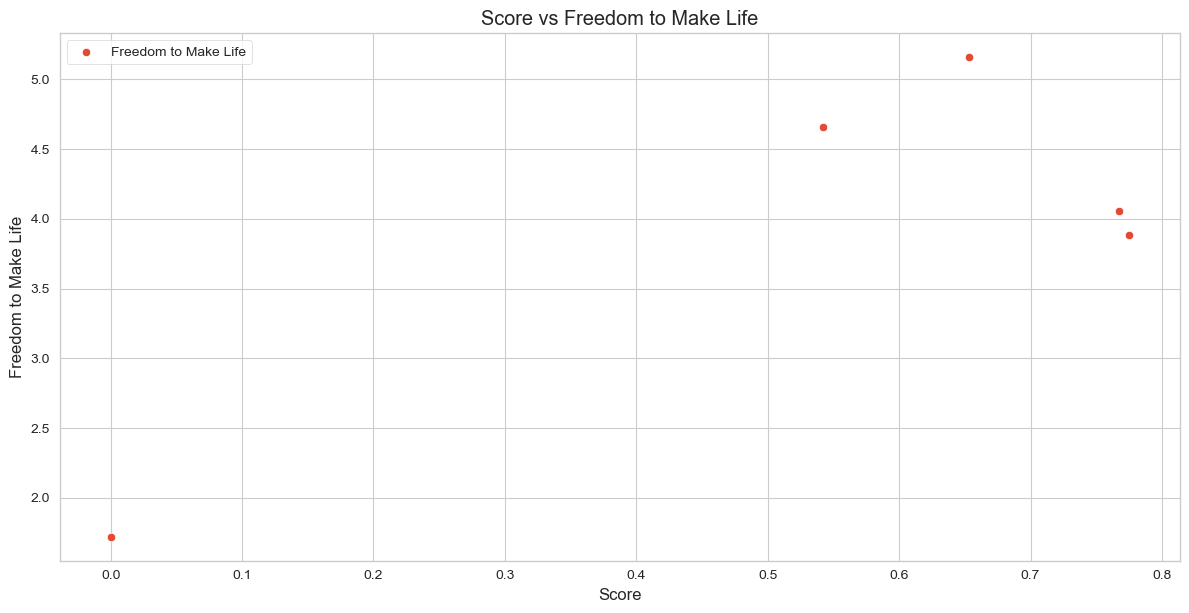

In [137]:
#Scatter plot
plt.figure(figsize = (12,6))
sns.scatterplot(
    x='Freedom_to_Make_Life_Choices',
    y='Score',
    data=df_south,
    label='Freedom to Make Life',
)
plt.tight_layout()
plt.title('Score vs Freedom to Make Life')
plt.xlabel('Score')
plt.ylabel('Freedom to Make Life')
plt.legend(loc='upper left')
plt.show()

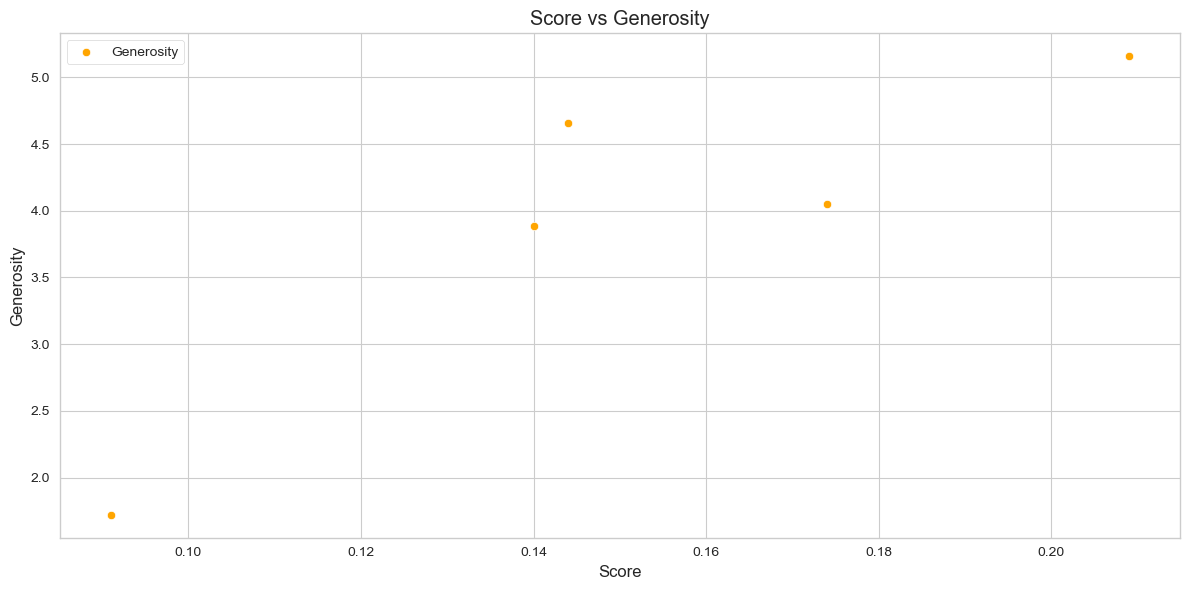

In [135]:
plt.figure(figsize = (12,6))
sns.scatterplot(
    x='Generosity',
    y='Score',
    data=df_south,
    label='Generosity',
    color='orange',
)
plt.title('Score vs Generosity')
plt.xlabel('Score')
plt.ylabel('Generosity')
plt.legend()
plt.tight_layout()
plt.show()

In [50]:
#Describe

#### Task - 5 - Gap Analysis:
Tasks:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.
2. Rank the South Asian countries by this gap in both ascending and descending order.
3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
4. Analyze the reasons behind these gaps and their implications for South Asian countries.

In [51]:
df_south.head()

,Country_Name,Score,Log_GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_to_Make_Life_Choices,Generosity,Perceptions_of_Corruption,Dystopia_and_Residual,Happiness_Category,Composite_Score
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874
3,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774
4,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238


In [52]:
df_south['GDP-Score Gap'] = df_south['Log_GDP_Per_Capita'] - df_south['Score']
df_south.head()

,Country_Name,Score,Log_GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_to_Make_Life_Choices,Generosity,Perceptions_of_Corruption,Dystopia_and_Residual,Happiness_Category,Composite_Score,GDP-Score Gap
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,-4.193
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888
3,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,-2.764
4,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,-1.093


In [53]:
#Order by ascending order
ascending_order_by_gpd_gap = df_south.sort_values(by=['GDP-Score Gap'])\
    .head()
ascending_order_by_gpd_gap

,Country_Name,Score,Log_GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_to_Make_Life_Choices,Generosity,Perceptions_of_Corruption,Dystopia_and_Residual,Happiness_Category,Composite_Score,GDP-Score Gap
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,-4.193
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888
3,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,-2.764
4,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,-1.093


In [54]:
#Order by descending order
descending_order_by_gdp_gap = df_south.sort_values(by=['GDP-Score Gap'], ascending=False).head()
descending_order_by_gdp_gap

,Country_Name,Score,Log_GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_to_Make_Life_Choices,Generosity,Perceptions_of_Corruption,Dystopia_and_Residual,Happiness_Category,Composite_Score,GDP-Score Gap
4,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,-1.093
3,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,-2.764
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,-4.193


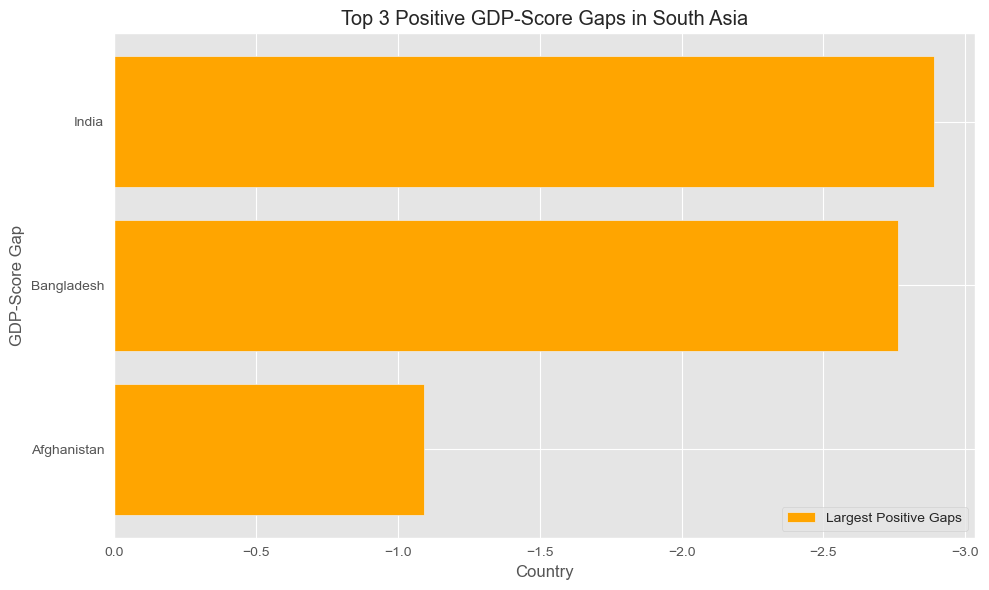

In [55]:
top_positive = descending_order_by_gdp_gap.head(3)
top_negative = ascending_order_by_gpd_gap.head(3)

plt.figure(figsize=(10, 6))
plt.barh(
    top_positive["Country_Name"],
    top_positive["GDP-Score Gap"],
    color='orange',
    label="Largest Positive Gaps"
)

plt.title("Top 3 Positive GDP-Score Gaps in South Asia")
plt.ylabel("GDP-Score Gap")
plt.xlabel("Country")
plt.legend()
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

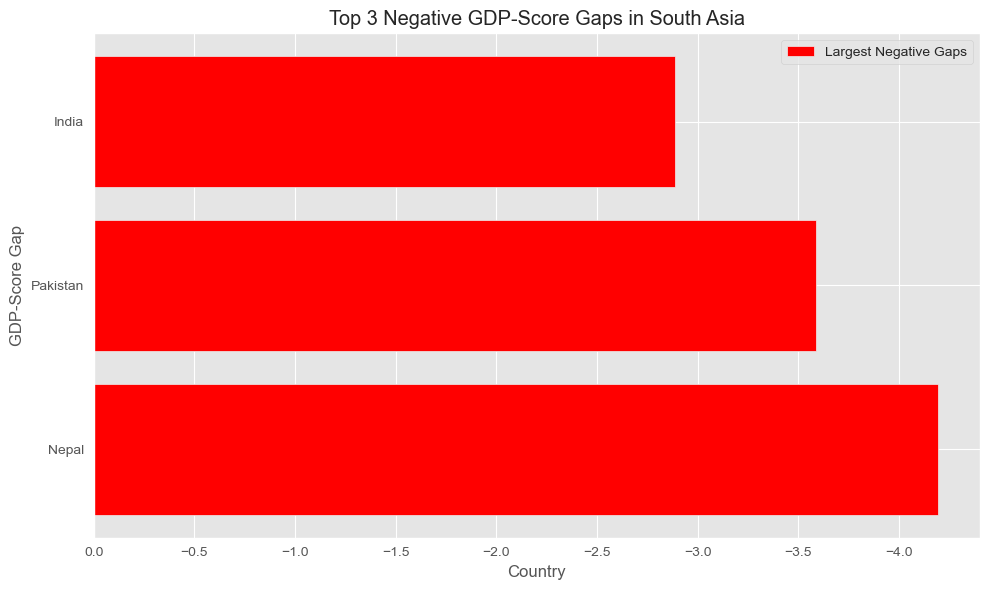

In [56]:
plt.figure(figsize=(10, 6))
plt.barh(
    top_negative["Country_Name"],
    top_negative["GDP-Score Gap"],
    color='red',
    label="Largest Negative Gaps"
)
plt.title("Top 3 Negative GDP-Score Gaps in South Asia")
plt.ylabel("GDP-Score Gap")
plt.xlabel("Country")
plt.legend()
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

In [57]:
#Describe

#### Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:
Tasks:
1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
                          "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",

                          "United Arab Emirates", "Yemen"]

In [58]:
middle_east_countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
                          "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
                          "United Arab Emirates", "Yemen"]

In [59]:
df_middle_east_countries = df.loc[df['Country_Name'] \
    .isin(middle_east_countries)] \
    .head(10)


In [60]:
df_middle_east_countries

,Country_Name,Score,Log_GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_to_Make_Life_Choices,Generosity,Perceptions_of_Corruption,Dystopia_and_Residual,Happiness_Category
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884,High
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741,High
27,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790,High
61,Bahrain,5.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium
91,Iraq,5.166,1.249,0.996,0.498,0.425,0.141,0.048,1.809,Medium
99,Iran,4.923,1.435,1.136,0.571,0.366,0.235,0.123,1.057,Medium
124,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504,Medium
132,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760,Low
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low


In [61]:
#df_middle_east_countries.to_csv('middle_east_countries.csv', index=True)

In [62]:
df_middle_east = pd.read_csv('middle_east_countries.csv')

In [63]:
df_middle_east.head(10)

,Unnamed: 0,Country_Name,Score,Log_GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_to_Make_Life_Choices,Generosity,Perceptions_of_Corruption,Dystopia_and_Residual,Happiness_Category
0,4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
1,12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884,High
2,21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741,High
3,27,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790,High
4,61,Bahrain,5.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium
5,91,Iraq,5.166,1.249,0.996,0.498,0.425,0.141,0.048,1.809,Medium
6,99,Iran,4.923,1.435,1.136,0.571,0.366,0.235,0.123,1.057,Medium
7,124,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504,Medium
8,132,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760,Low
9,141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low


In [64]:
#df_middle_east_countries.dropna(axis=0, inplace=True)
df_middle_east_countries.isnull().sum()


Country_Name                    0
Score                           0
Log_GDP_Per_Capita              1
Social_Support                  1
Healthy_Life_Expectancy         1
Freedom_to_Make_Life_Choices    1
Generosity                      1
Perceptions_of_Corruption       1
Dystopia_and_Residual           1
Happiness_Category              0
dtype: int64

In [65]:
df_middle_east_countries.head(10)

,Country_Name,Score,Log_GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_to_Make_Life_Choices,Generosity,Perceptions_of_Corruption,Dystopia_and_Residual,Happiness_Category
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884,High
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741,High
27,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790,High
61,Bahrain,5.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium
91,Iraq,5.166,1.249,0.996,0.498,0.425,0.141,0.048,1.809,Medium
99,Iran,4.923,1.435,1.136,0.571,0.366,0.235,0.123,1.057,Medium
124,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504,Medium
132,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760,Low
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low


#### 1. Descriptive Statistics:
• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
• Which region has higher happiness Scores on average?

In [66]:
mean_value_middle_east = df_middle_east['Score'].mean()
mean_value_south_asian = df_south['Score'].mean()
print(f"The mean value of score for middle east country is {round(mean_value_middle_east,2)}")
print(f"The mean value of score for south asian country is {round(mean_value_south_asian,2)}")

The mean value of score for middle east country is 5.41
The mean value of score for south asian country is 3.9


In [67]:
std_value_middle_east = df_middle_east['Score'].std()
std_value_south_asian = df_south['Score'].std()
print(f"The standard deviation value of score for middle eastern country is {round(std_value_middle_east,2)}")
print(f"The standard deviation value of score for south asian country is {round(std_value_south_asian,2)}")

The standard deviation value of score for middle eastern country is 1.57
The standard deviation value of score for south asian country is 1.32


In [68]:
# Describe

#### 2. Top and Bottom Performers:
• Identify the top 3 and bottom 3 countries in each region based on the score.
• Plot bar charts comparing these charts.

In [69]:
top_three_middle_east = df_middle_east_countries.sort_values(by=['Score'], ascending=False)\
    .head(3)
top_three_south_asia = df_south.sort_values(by=['Score'], ascending=False)\
    .head(3)

bottom_three_middle_eastern = df_middle_east_countries.sort_values(by=['Score'])\
    .head(3)
bottom_three_south_asian = df_south.sort_values(by=['Score'])\
    .head(3)

In [70]:
top_three_middle_east

,Country_Name,Score,Log_GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_to_Make_Life_Choices,Generosity,Perceptions_of_Corruption,Dystopia_and_Residual,Happiness_Category
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884,High
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741,High


In [71]:
top_three_south_asia

,Country_Name,Score,Log_GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_to_Make_Life_Choices,Generosity,Perceptions_of_Corruption,Dystopia_and_Residual,Happiness_Category,Composite_Score,GDP-Score Gap
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,-4.193
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888


In [72]:
bottom_three_middle_eastern

,Country_Name,Score,Log_GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_to_Make_Life_Choices,Generosity,Perceptions_of_Corruption,Dystopia_and_Residual,Happiness_Category
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low
132,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760,Low
124,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504,Medium


In [73]:
bottom_three_south_asian

,Country_Name,Score,Log_GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_to_Make_Life_Choices,Generosity,Perceptions_of_Corruption,Dystopia_and_Residual,Happiness_Category,Composite_Score,GDP-Score Gap
4,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,-1.093
3,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,-2.764
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888


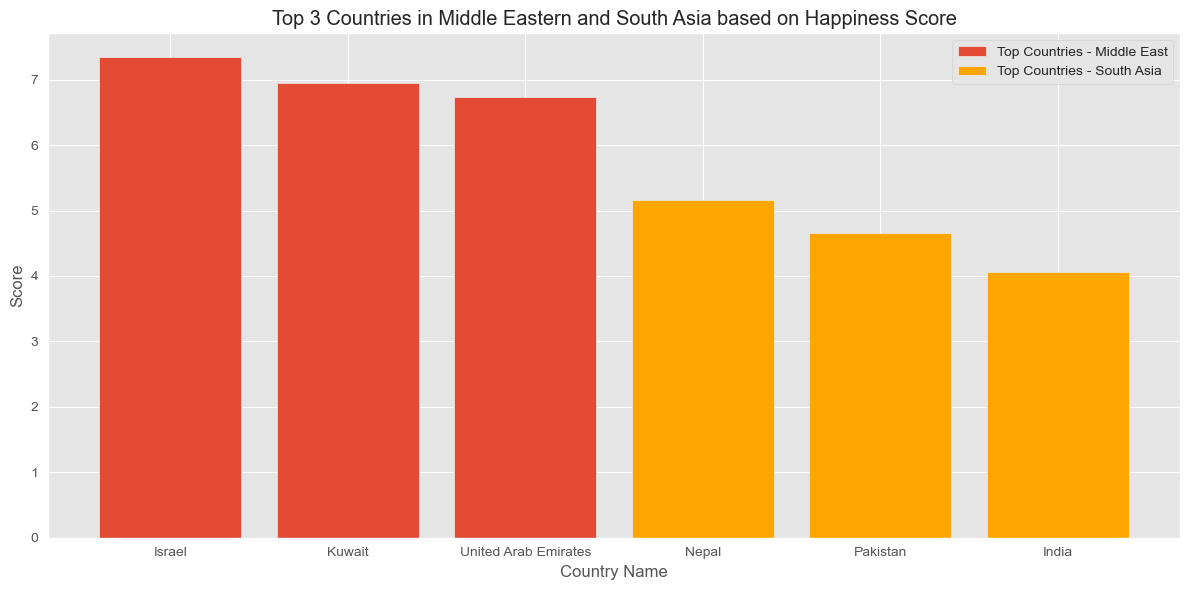

In [74]:
plt.figure(figsize=(12, 6))
plt.bar(
    top_three_middle_east["Country_Name"],
    top_three_middle_east["Score"],
    label='Top Countries - Middle East'
)
plt.bar(
    top_three_south_asia["Country_Name"],
    top_three_south_asia["Score"],
    label='Top Countries - South Asia',
    color= 'orange'
)
plt.title("Top 3 Countries in Middle Eastern and South Asia based on Happiness Score")
plt.xlabel("Country Name")
plt.ylabel("Score")
plt.legend()
plt.tight_layout()
plt.show()


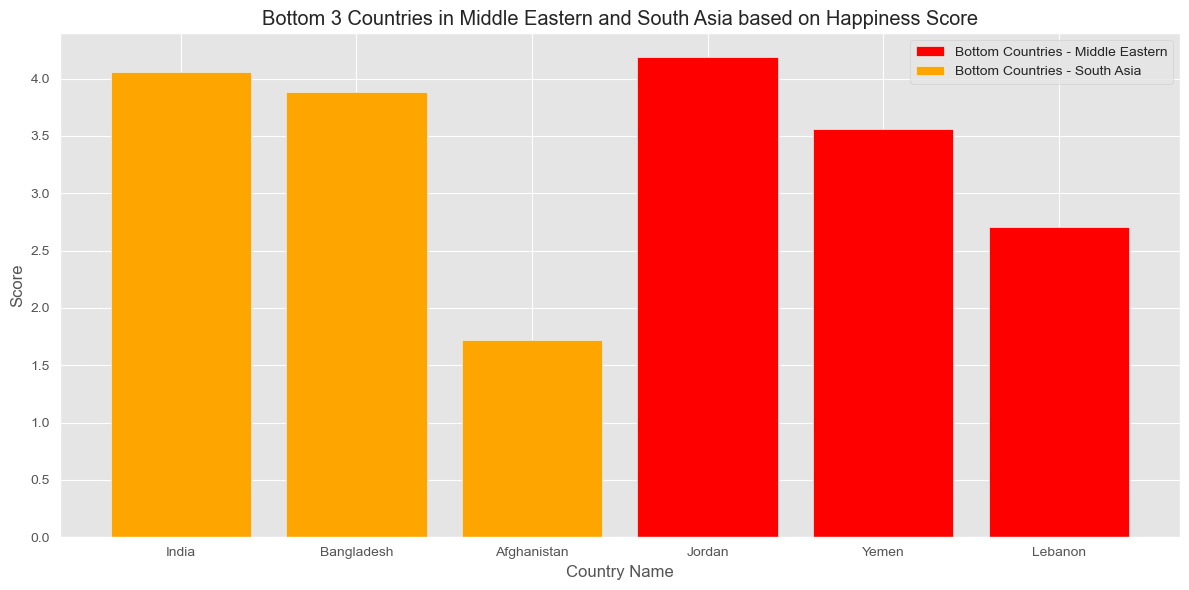

In [75]:
plt.figure(figsize=(12, 6))
plt.bar(
    bottom_three_middle_eastern['Country_Name'],
    bottom_three_middle_eastern["Score"],
    label='Bottom Countries - Middle Eastern',
    color='red'
)
plt.bar(
    bottom_three_south_asian['Country_Name'],
    bottom_three_south_asian['Score'],
    label='Bottom Countries - South Asia',
    color='orange'
)
plt.title('Bottom 3 Countries in Middle Eastern and South Asia based on Happiness Score')
plt.xlabel('Country Name')
plt.ylabel('Score')
plt.gca().invert_xaxis()
plt.legend()
plt.tight_layout()
plt.show()

#### 3. Metric Comparisons:
• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.
• Which metrics show the largest disparity between the two regions?

In [76]:
# Calculating matrices value for middle eastern countres

# Check for any potential outliers
df_middle_east_countries['Log_GDP_Per_Capita'].agg(['min','max'])


min    0.671
max    1.983
Name: Log_GDP_Per_Capita, dtype: float64

In [77]:
df_middle_east_countries['Social_Support'].agg(['min','max'])

min    0.577
max    1.513
Name: Social_Support, dtype: float64

In [78]:
df_middle_east_countries['Healthy_Life_Expectancy'].agg(['min','max'])

min    0.293
max    0.740
Name: Healthy_Life_Expectancy, dtype: float64

In [79]:
# Calculating mean
gdp_middle_east = round(df_middle_east_countries['Log_GDP_Per_Capita'].mean(),3)
gdp_middle_east

1.496

In [80]:
social_middle_east = round(df_middle_east_countries['Social_Support'].mean(),3)
social_middle_east

1.153

In [81]:
healthy_life_middle_east = round(df_middle_east_countries['Healthy_Life_Expectancy'].mean(),3)
healthy_life_middle_east

0.554

In [82]:
df_south['Log_GDP_Per_Capita'].agg(['min','max'])

min    0.628
max    1.166
Name: Log_GDP_Per_Capita, dtype: float64

In [83]:
df_south['Social_Support'].agg(['min','max'])

min    0.00
max    0.99
Name: Social_Support, dtype: float64

In [84]:
df_south['Healthy_Life_Expectancy'].agg(['min','max'])

min    0.242
max    0.513
Name: Healthy_Life_Expectancy, dtype: float64

In [85]:
gdp_south_asia = round(df['Log_GDP_Per_Capita'].mean(),3)
gdp_south_asia

1.379

In [86]:
social_south_asia = round(df['Social_Support'].mean(),3)
social_south_asia

1.134

In [87]:
healthy_life_south_asia = round(df['Healthy_Life_Expectancy'].mean(),3)
healthy_life_south_asia

0.521

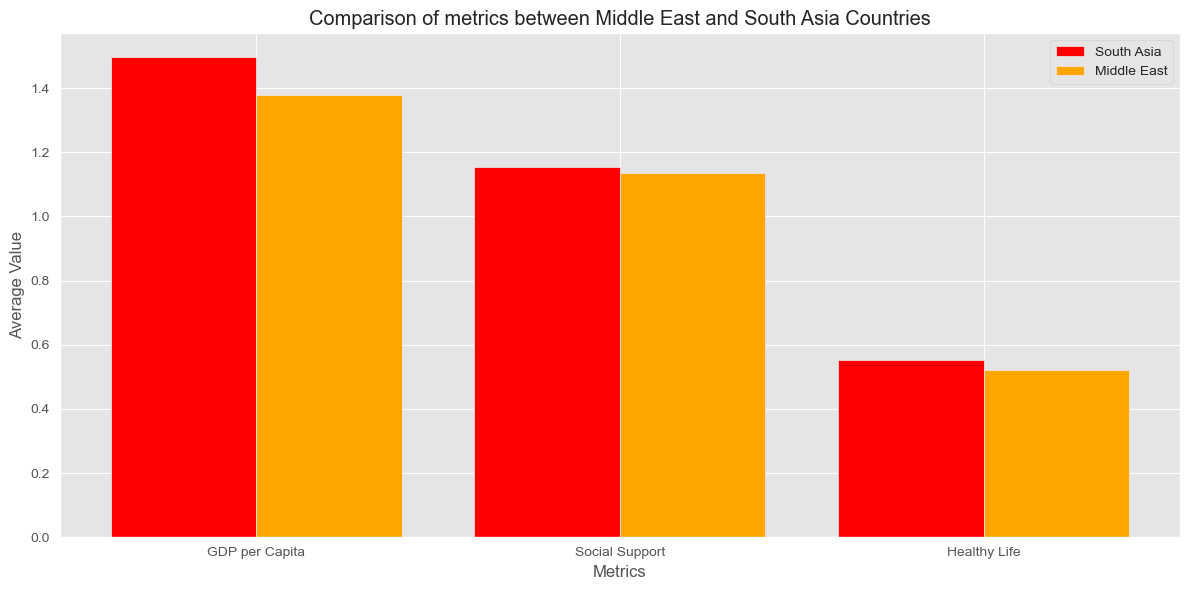

In [88]:
#Multi bar plotting
metrics = ['GDP per Capita', 'Social Support', 'Healthy Life']
south_asia = [gdp_south_asia, social_south_asia, healthy_life_south_asia]
middle_east =[gdp_middle_east, social_middle_east, healthy_life_middle_east]

x = np.arange(len(metrics))
width_bar = 0.4
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(
    x-width_bar/2,
    middle_east,
    width=width_bar,
    label='South Asia',
    color='red'
)
ax.bar(
    x+width_bar/2,
    south_asia,
    width=width_bar,
    label='Middle East',
    color='orange'
)
ax.set_xlabel('Metrics')
ax.set_ylabel('Average Value')
ax.set_title('Comparison of metrics between Middle East and South Asia Countries')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
plt.tight_layout()
plt.show()





#### 4. Happiness Disparity:
• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.
• Which region has greater variability in happiness?

In [89]:
range_middle_eastern = (df_middle_east_countries['Score'].max()) - (df_middle_east_countries['Score'].min())
range_middle_eastern

4.634

In [90]:
range_south_asian = round((df_south['Score'].max()) - (df_south['Score'].min()),3)
range_south_asian

3.437

In [91]:
# Cofficient of vairence
cofficient_middle_eastern = round((df_middle_east_countries['Score'].std())/(df_middle_east_countries['Score'].mean()),3)
cofficient_middle_eastern

0.289

In [92]:
cofficient_south_asian = round((df_south['Score'].std())/(df_south['Score'].mean()),3)
cofficient_south_asian

0.338

In [93]:
#Descriibe

#### 5. Correlation Analysis:
• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.
• Create scatter plots to visualize and interpret the relationships.

In [94]:
correlation_middle_east_freedom = round(df_middle_east_countries['Score'].corr(df_middle_east_countries['Freedom_to_Make_Life_Choices']),3)
correlation_middle_east_freedom

0.863

In [95]:
correlation_middle_east_generosity = round(df_middle_east_countries['Score'].corr(df_middle_east_countries['Generosity']),3)
correlation_middle_east_generosity

0.628

In [96]:
correlation_south_asian_freedom = round(df_south['Score'].corr(df_south['Freedom_to_Make_Life_Choices']),3)
correlation_south_asian_freedom

0.801

In [97]:
correlation_south_asian_generosity = round(df_south['Score'].corr(df_south['Generosity']),3)
correlation_south_asian_generosity

0.877

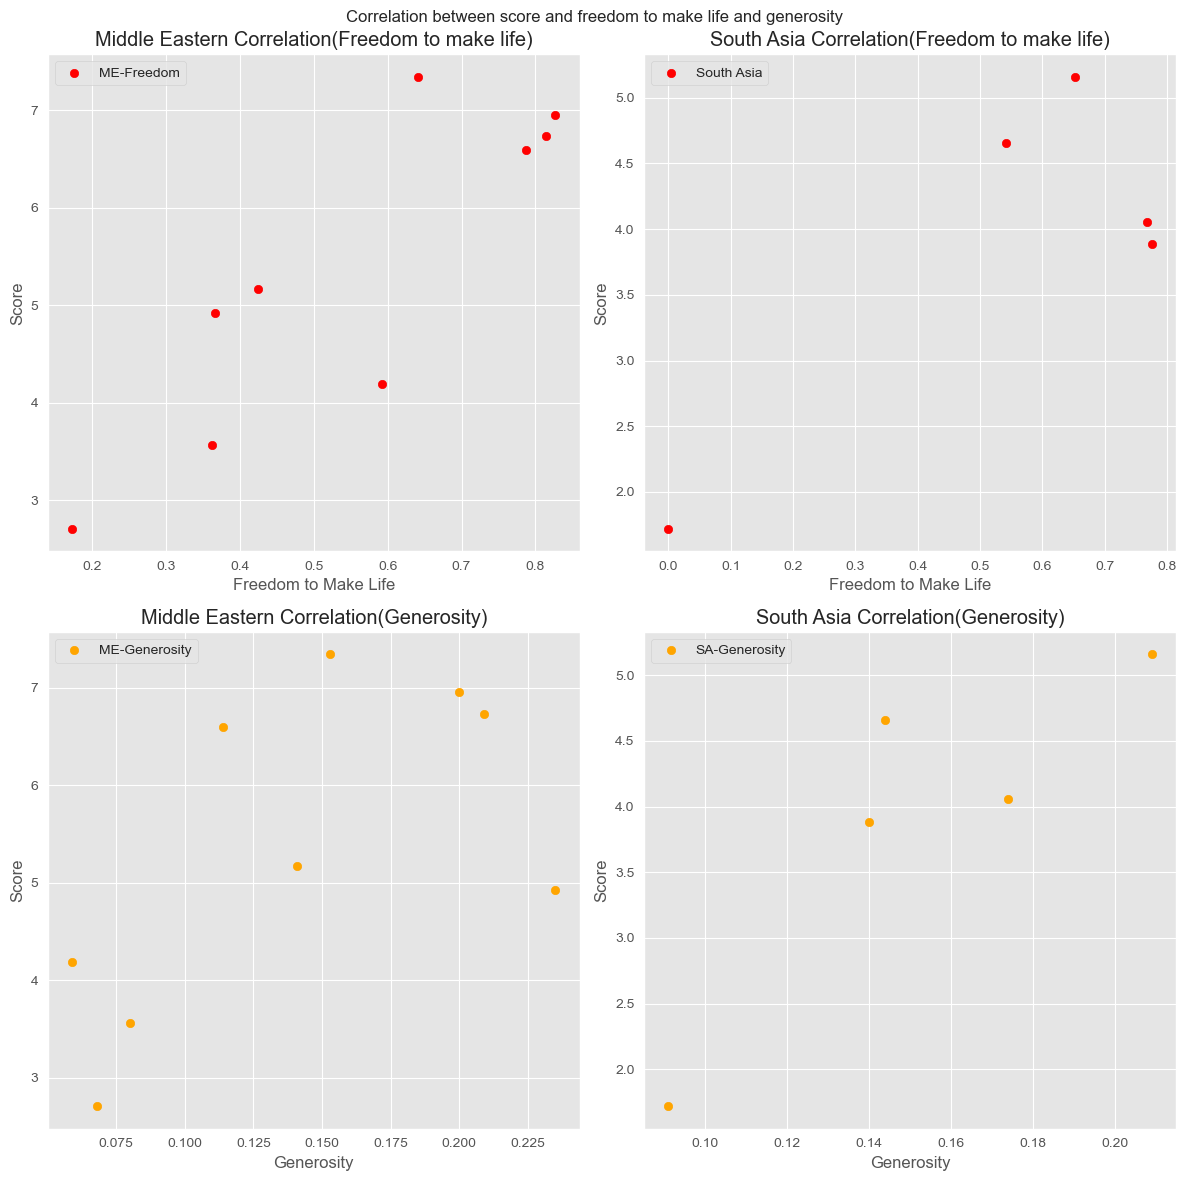

In [98]:
fig, ax = plt.subplots(2,2, figsize=(12, 12))

ax[0,0].scatter(
    df_middle_east_countries['Freedom_to_Make_Life_Choices'],
    df_middle_east_countries['Score'],
    #data=correlation_middle_east_freedom,
    label='ME-Freedom',
    color='red'
)
ax[0,1].scatter(
    df_south['Freedom_to_Make_Life_Choices'],
    df_south['Score'],
    #data=correlation_south_asian_freedom,
    label='South Asia',
    color='red'
)
ax[1,0].scatter(
    df_middle_east_countries['Generosity'],
    df_middle_east_countries['Score'],
    #data=correlation_middle_east_generosity,
    label='ME-Generosity',
    color='orange'
)
ax[1,1].scatter(
    df_south['Generosity'],
    df_south['Score'],
    #data=correlation_south_asian_generosity,
    label='SA-Generosity',
    color='orange'
)
ax[0,0].legend(loc='upper left')
ax[0,1].legend(loc='upper left')
ax[1,0].legend(loc='upper left')
ax[1,1].legend(loc='upper left')

ax[0,0].set_xlabel('Freedom to Make Life')
ax[0,0].set_ylabel('Score')
ax[0,0].set_title('Middle Eastern Correlation(Freedom to make life)')

ax[0,1].set_xlabel('Freedom to Make Life')
ax[0,1].set_ylabel('Score')
ax[0,1].set_title('South Asia Correlation(Freedom to make life)')

ax[1,0].set_xlabel('Generosity')
ax[1,0].set_ylabel('Score')
ax[1,0].set_title('Middle Eastern Correlation(Generosity)')

ax[1,1].set_xlabel('Generosity')
ax[1,1].set_ylabel('Score')
ax[1,1].set_title('South Asia Correlation(Generosity)')

plt.suptitle('Correlation between score and freedom to make life and generosity')
fig.subplots_adjust(hspace=0.9, wspace=0.8)
plt.tight_layout()
plt.show()

#### 6. Outlier Detection:
• Identify outlier countries in both regions based on Score and GDP per Capita.
• Plot these outliers and discuss their implications.

In [99]:
def outlier_detection(dataset):
    q1 = dataset.quantile(0.25)
    q3 = dataset.quantile(0.75)
    Inter_Quartile_Range = q3 - q1
    lower_bound = q1 - 1.5 * Inter_Quartile_Range
    upper_bound = q3 + 1.5 * Inter_Quartile_Range
    return dataset[(dataset < lower_bound) | (dataset > upper_bound)]

In [100]:
def detect_outliers_iqr(data, column_name):
    q1 = data[column_name].quantile(0.25)
    q3 = data[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    return outliers

outliers_middle_east_score = detect_outliers_iqr(df_middle_east_countries, 'Score')
outliers_middle_east_gdp = detect_outliers_iqr(df_middle_east_countries, 'Log_GDP_Per_Capita')

outliers_south_asia_score = detect_outliers_iqr(df_south, 'Score')
outliers_south_asia_gdp = detect_outliers_iqr(df_south, 'Log_GDP_Per_Capita')

outliers_middle_east = pd.concat([outliers_middle_east_score, outliers_middle_east_gdp]).drop_duplicates()
outliers_south_asia = pd.concat([outliers_south_asia_score, outliers_south_asia_gdp]).drop_duplicates()

print("Middle East Outliers:")
outliers_middle_east

print("South Asia Outliers:")
outliers_south_asia


Middle East Outliers:
South Asia Outliers:


,Country_Name,Score,Log_GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_to_Make_Life_Choices,Generosity,Perceptions_of_Corruption,Dystopia_and_Residual,Happiness_Category,Composite_Score,GDP-Score Gap
4,Afghanistan,1.721,0.628,0.0,0.242,0.0,0.091,0.088,0.672,Low,0.3238,-1.093


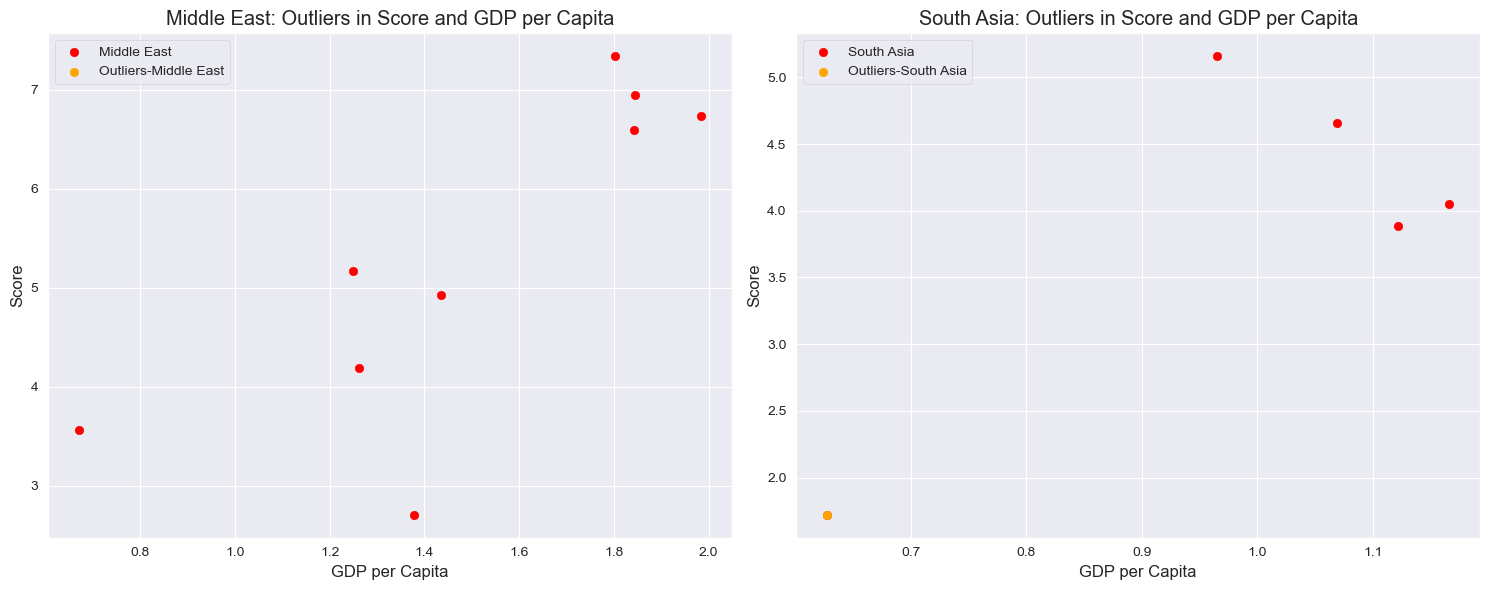

In [103]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].scatter(
    df_middle_east_countries['Log_GDP_Per_Capita'],
    df_middle_east_countries['Score'],
    label='Middle East',
    color='red'
)
ax[0].scatter(
    outliers_middle_east['Log_GDP_Per_Capita'],
    outliers_middle_east['Score'],
    color='orange',
    label='Outliers-Middle East',
)
ax[0].set_title('Middle East: Outliers in Score and GDP per Capita')
ax[0].set_xlabel('GDP per Capita')
ax[0].set_ylabel('Score')
ax[0].legend(loc='upper left')

ax[1].scatter(
    df_south['Log_GDP_Per_Capita'],
    df_south['Score'],
    label='South Asia',
    color='red'
)
ax[1].scatter(
    outliers_south_asia_gdp['Log_GDP_Per_Capita'],
    outliers_south_asia_gdp['Score'],
    color='orange',
    label='Outliers-South Asia'
)
ax[1].set_title('South Asia: Outliers in Score and GDP per Capita')
ax[1].set_xlabel('GDP per Capita')
ax[1].set_ylabel('Score')
ax[1].legend(loc='upper left')

plt.tight_layout()
plt.show()


#### 7. Visualization:
• Create boxplots comparing the distribution of Score between South Asia and the Middle East.
• Interpret the key differences in distribution shapes, medians, and outliers.

In [105]:
#Combining middle east and south asian country data set
df_combined = pd.concat([
    df_middle_east_countries[['Score']].assign(Region='Middle East'),
    df_south[['Score']].assign(Region='South Asia'),
])

In [108]:
df_combined.head(15)

,Score,Region
4,7.341,Middle East
12,6.951,Middle East
21,6.733,Middle East
27,6.594,Middle East
61,5.959,Middle East
91,5.166,Middle East
99,4.923,Middle East
124,4.186,Middle East
132,3.561,Middle East
141,2.707,Middle East


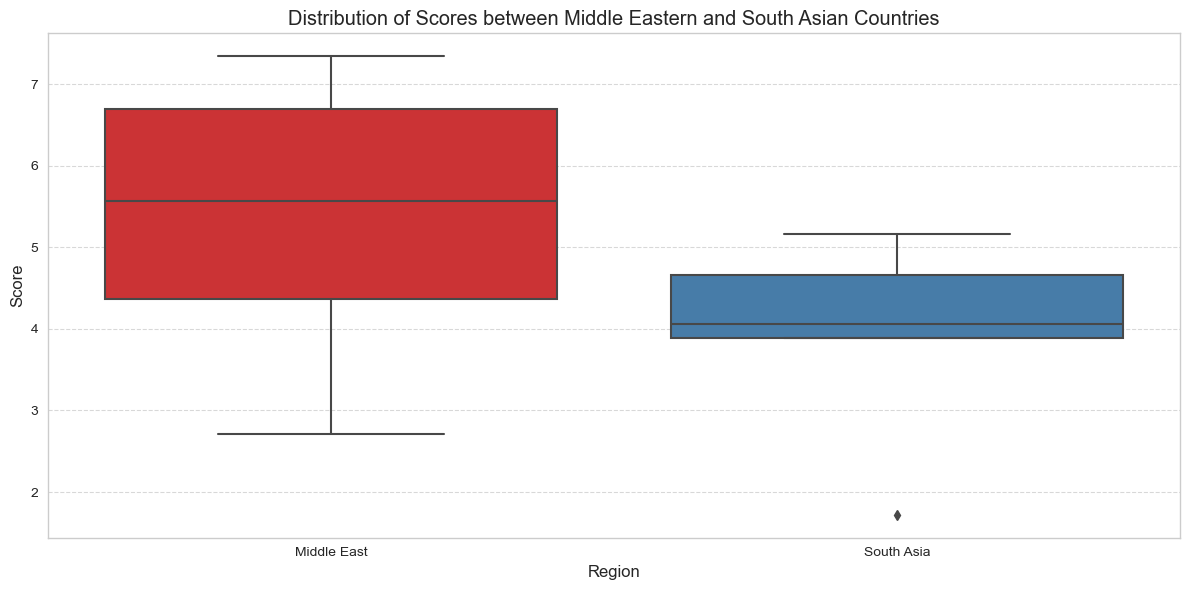

In [131]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Region',
    y='Score',
    data=df_combined,
    palette='Set1',
    linewidth=1.5,
)
plt.title('Distribution of Scores between Middle Eastern and South Asian Countries')
plt.xlabel('Region')
plt.ylabel('Score')
plt.grid(axis='y', linestyle='dashed', alpha=0.75)
plt.tight_layout()

In [127]:
df_south_asian_countries['Score'].describe()

count    5.000000
mean     3.895200
std      1.316003
min      1.721000
25%      3.886000
50%      4.054000
75%      4.657000
max      5.158000
Name: Score, dtype: float64

In [128]:
df_middle_east_countries['Score'].describe()

count    10.000000
mean      5.412100
std       1.566201
min       2.707000
25%       4.370250
50%       5.562500
75%       6.698250
max       7.341000
Name: Score, dtype: float64

In [ ]:
#Describe